In [1]:
import numpy as np

import matplotlib.pyplot as plt

from astropy.io import fits

import math # Python math module
from math import log #importing logarithm

# adding all the packages, tasks, stuff I might need for graphing, so I need to run it before I run the other cells

# to plot in 3d
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 
# This is a magic function. With this backend, the output of plotting commands is displayed inline 
# within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will 
# then also be stored in the notebook document.


import csv # to read text files or comma separated values
import sys # This module provides access to some variables used or maintained by the interpreter and to functions that 
# interact strongly with the interpreter. It is always available.
import math # Python math module

from matplotlib import cm # color map
from matplotlib.mlab import griddata # fits a surface of the form z = f(x,y) to the data in the (usually) nonuniformly 
# spaced vectors (x,y,z).

import os # This module provides a portable way of using operating system dependent functionality. With it I can open
# and read files, for example.

from matplotlib.ticker import LinearLocator, FormatStrFormatter

np.set_printoptions(threshold=np.inf) # print the whole array

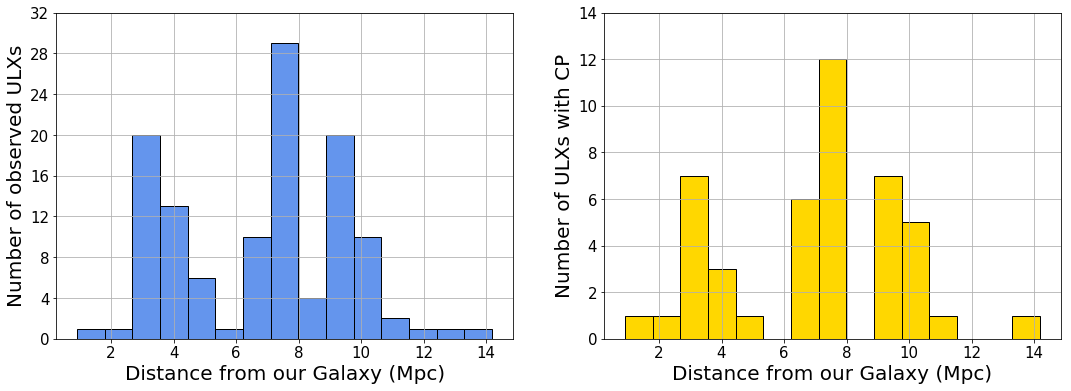

In [449]:
from scipy.stats import norm
import matplotlib.mlab as mlab
%matplotlib inline

dist_obs = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/dist_obs.csv','r') as csvfile:
    data = csv.reader(csvfile, delimiter=' ')
    for row in data:
        dist_obs.append(float(row[0]))
        
dist_det = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/dist_det.csv','r') as csvfile:
    data = csv.reader(csvfile, delimiter=' ')
    for row in data:
        dist_det.append(float(row[0]))
                     
histo_dist=plt.figure(1, figsize=(18,6))

plt.subplot(1, 2, 1)
plt.hist(dist_obs, normed=False, bins=15, edgecolor='black', facecolor='cornflowerblue') #histogram of data
#plt.hist(dist_det, normed=False, bins=10, edgecolor='black', facecolor='gold')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Number of observed ULXs', fontsize=20)
plt.xlabel('Distance from our Galaxy (Mpc)', fontsize=20)
plt.yticks(np.arange(0, 36, 4))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(dist_det, normed=False, bins=15, edgecolor='black', facecolor='gold')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Number of ULXs with CP', fontsize=20)
plt.xlabel('Distance from our Galaxy (Mpc)', fontsize=20)
plt.yticks(np.arange(0, 16, 2))
plt.grid(True)

histo_dist.savefig('dist_obs.png',dpi=400)

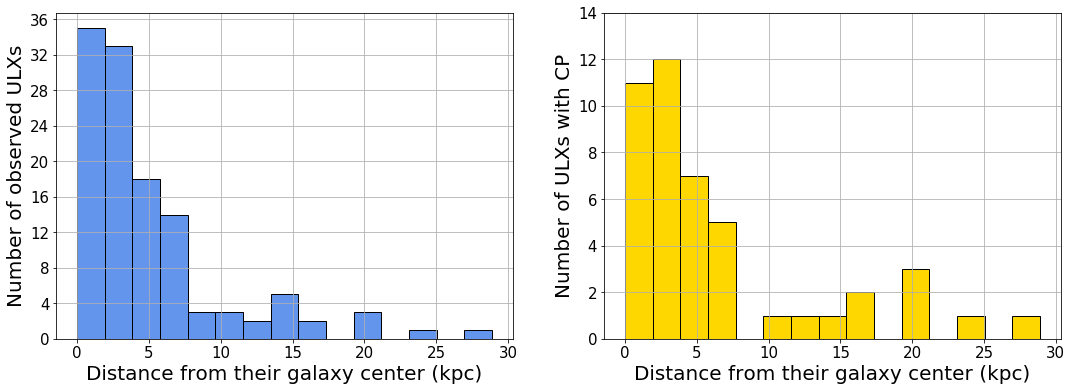

In [511]:
dist_center_obs = [] # Defining the array
dist_center_det = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/distance_to_center.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        dist_center_obs.append(float(row[0]))

# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/distance_to_center_det.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=' ')
    for row in data:
        dist_center_det.append(float(row[0]))
        
histo_dist_center=plt.figure(1, figsize=(18,6))

plt.subplot(1, 2, 1)
plt.hist(dist_center_obs, normed=False, bins=15, edgecolor='black', facecolor='cornflowerblue') #histogram of data
#plt.hist(dist_det, normed=False, bins=10, edgecolor='black', facecolor='gold')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Number of observed ULXs', fontsize=20)
plt.xlabel('Distance from their galaxy center (kpc)', fontsize=20)
plt.yticks(np.arange(0, 40, 4))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(dist_center_det, normed=False, bins=15, edgecolor='black', facecolor='gold')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Number of ULXs with CP', fontsize=20)
plt.xlabel('Distance from their galaxy center (kpc)', fontsize=20)
plt.yticks(np.arange(0, 16, 2))
plt.grid(True)

histo_dist_center.savefig('dist_center.png',dpi=400)

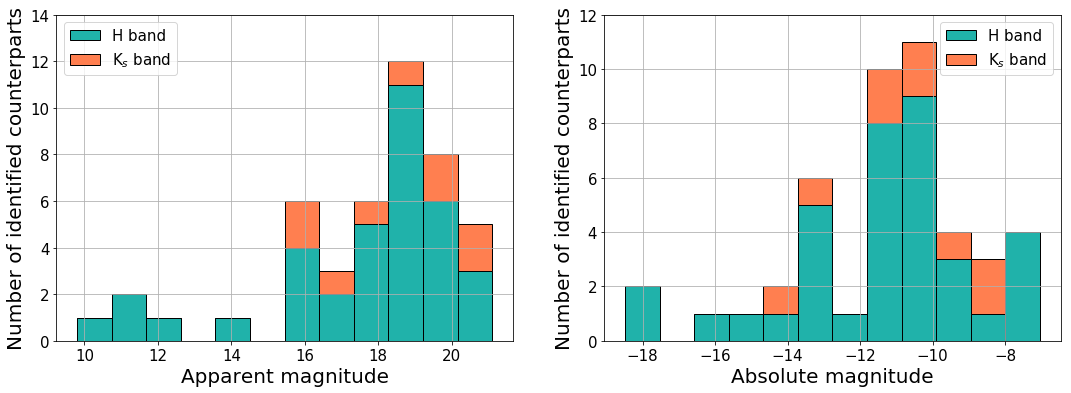

In [517]:
app_det_h = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/app_mag_det_h.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=' ')
    for row in data:
        app_det_h.append(float(row[0]))
        
abs_det_h = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/abs_mag_det_h.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=' ')
    for row in data:
        abs_det_h.append(float(row[0]))
        
app_det_k = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/app_mag_det_k.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=' ')
    for row in data:
        app_det_k.append(float(row[0]))
        
abs_det_k = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/abs_mag_det_k.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=' ')
    for row in data:
        abs_det_k.append(float(row[0]))

             
histo_mags=plt.figure(1, figsize=(18,6))

plt.subplot(1, 2, 1)
plt.hist([app_det_h, app_det_k], normed=False, bins=12, edgecolor='black', color=["lightseagreen", "coral"], stacked=True) #histogram of data
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('H band',r'K$_s$ band'), fontsize=15)
plt.ylim(0,14)
plt.ylabel('Number of identified counterparts', fontsize=20)
plt.xlabel('Apparent magnitude', fontsize=20)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist([abs_det_h, abs_det_k], normed=False, bins=12, edgecolor='black', color=["lightseagreen", "coral"], stacked=True, label=("H band","K band")) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('H band',r'K$_s$ band'), fontsize=15)
plt.ylabel('Number of identified counterparts', fontsize=20)
plt.xlabel('Absolute magnitude', fontsize=20)
plt.yticks(np.arange(0, 14, 2))
plt.grid(True)

histo_mags.savefig('histo_mags.png',dpi=400)

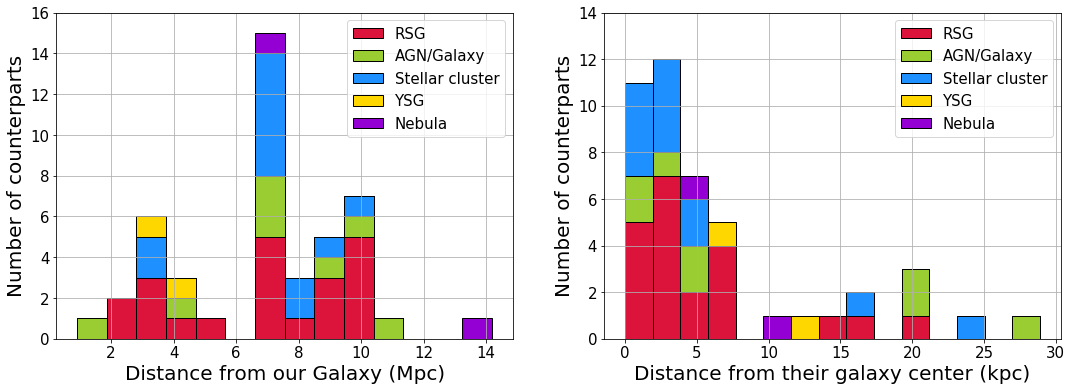

In [531]:
det_rsg = [] # Defining the array
dist_rsg = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/det_rsg.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        det_rsg.append(float(row[0]))

with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/dist_rsg.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        dist_rsg.append(float(row[0])*1e-3)    
        
det_agn = [] # Defining the array
dist_agn = [] # Defining the array

# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/det_agn.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        det_agn.append(float(row[0]))

with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/dist_agn.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        dist_agn.append(float(row[0])*1e-3)   
        
det_sc = [] # Defining the array
dist_sc = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/det_sc.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        det_sc.append(float(row[0]))
        
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/dist_sc.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        dist_sc.append(float(row[0])*1e-3)   

det_ysg = [3.56, 4.25]
dist_ysg = [13245.54343*1e-3,7658.9899*1e-3]
        
det_neb = [7.24, 14.19]
dist_neb = [4672.16988*1e-3,10477.97539*1e-3]

             
histo_class=plt.figure(1, figsize=(18,6))

plt.subplot(1, 2, 1)
plt.hist([det_rsg, det_agn, det_sc, det_ysg, det_neb], normed=False, bins=14, edgecolor='black', stacked=True, color=['crimson','yellowgreen','dodgerblue','gold','darkviolet']) #histogram of data
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('RSG','AGN/Galaxy', 'Stellar cluster', 'YSG', 'Nebula'), fontsize=15)
plt.ylabel('Number of counterparts', fontsize=20)
plt.xlabel('Distance from our Galaxy (Mpc)', fontsize=20)
plt.yticks(np.arange(0, 18, 2))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist([dist_rsg, dist_agn, dist_sc, dist_ysg, dist_neb], normed=False, bins=15, edgecolor='black', stacked=True) #histogram of data
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('RSG','AGN/Galaxy', 'Stellar cluster', 'YSG', 'Nebula'), fontsize=15)
plt.ylabel('Number of counterparts', fontsize=20)
plt.xlabel('Distance from their galaxy center (kpc)', fontsize=20)
#plt.gca().set_xscale("log")
plt.yticks(np.arange(0, 16, 2))
plt.grid(True)

histo_class.savefig('histo_class.png',dpi=400)

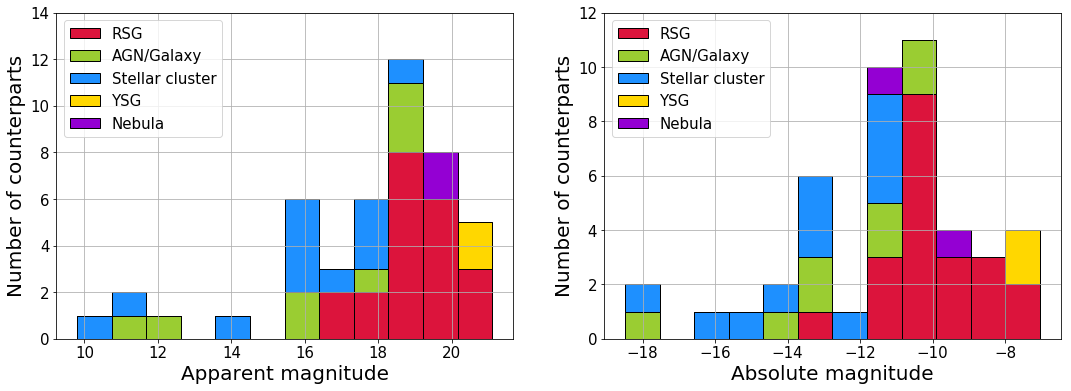

In [532]:
app_rsg = [] # Defining the array
abs_rsg = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/det_rsg.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        app_rsg.append(float(row[1]))
        abs_rsg.append(float(row[2]))

app_agn = [] # Defining the array
abs_agn = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/det_agn.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        app_agn.append(float(row[1]))
        abs_agn.append(float(row[2]))

app_sc = [] # Defining the array
abs_sc = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/det_sc.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        app_sc.append(float(row[1]))
        abs_sc.append(float(row[2]))

app_ysg = [20.4, 21.1]
abs_ysg = [-7.36, -7.04]
        
app_neb = [20.1, 19.83]
abs_neb = [-9.20, -10.93]

histo_class_mags=plt.figure(1, figsize=(18,6))

plt.subplot(1, 2, 1)
plt.hist([app_rsg, app_agn, app_sc, app_ysg, app_neb], normed=False, bins=12, edgecolor='black', stacked=True, color=['crimson','yellowgreen','dodgerblue','gold','darkviolet']) #histogram of data
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('RSG','AGN/Galaxy', 'Stellar cluster', 'YSG', 'Nebula'), fontsize=15)
plt.ylabel('Number of counterparts', fontsize=20)
plt.xlabel('Apparent magnitude', fontsize=20)
plt.yticks(np.arange(0, 16, 2))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist([abs_rsg, abs_agn, abs_sc, abs_ysg, abs_neb], normed=False, bins=12, edgecolor='black', stacked=True, color=['crimson','yellowgreen','dodgerblue','gold','darkviolet']) #histogram of data
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('RSG','AGN/Galaxy', 'Stellar cluster', 'YSG', 'Nebula'), fontsize=15)
plt.ylabel('Number of counterparts', fontsize=20)
plt.xlabel('Absolute magnitude', fontsize=20)
plt.yticks(np.arange(0, 14, 2))
plt.grid(True)

histo_class_mags.savefig('histo_class_mags.png',dpi=400)

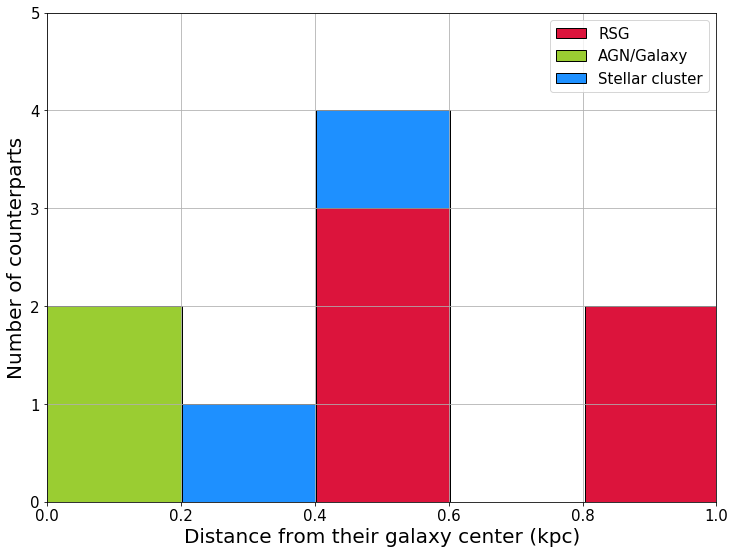

In [534]:
dist_rsg = [] # Defining the array

with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/dist_rsg.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        dist_rsg.append(float(row[0])*1.0e-3)    

dist_agn = [] # Defining the array

with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/dist_agn.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        dist_agn.append(float(row[0])*1e-3)   

dist_sc = [] # Defining the array
        
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/dist_sc.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        dist_sc.append(float(row[0])*1e-3)   

dist_ysg = [13245.54343*1e-3,7658.9899*1e-3]

dist_neb = [4672.16988*1e-3,10477.97539*1e-3]

             
histo_class_insert=plt.figure(1, figsize=(12,9))

plt.hist([dist_rsg, dist_agn, dist_sc, dist_ysg, dist_neb], normed=False, bins=144, edgecolor='black', stacked=True, color=['crimson','yellowgreen','dodgerblue','gold','darkviolet']) #histogram of data
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('RSG','AGN/Galaxy', 'Stellar cluster'), fontsize=15)
plt.ylabel('Number of counterparts', fontsize=20)
plt.xlabel('Distance from their galaxy center (kpc)', fontsize=20)
#plt.gca().set_xscale("log")
plt.xlim(0,1)
plt.ylim(0,5)
plt.grid(True)

histo_class_insert.savefig('histo_class_insert.png',dpi=400)

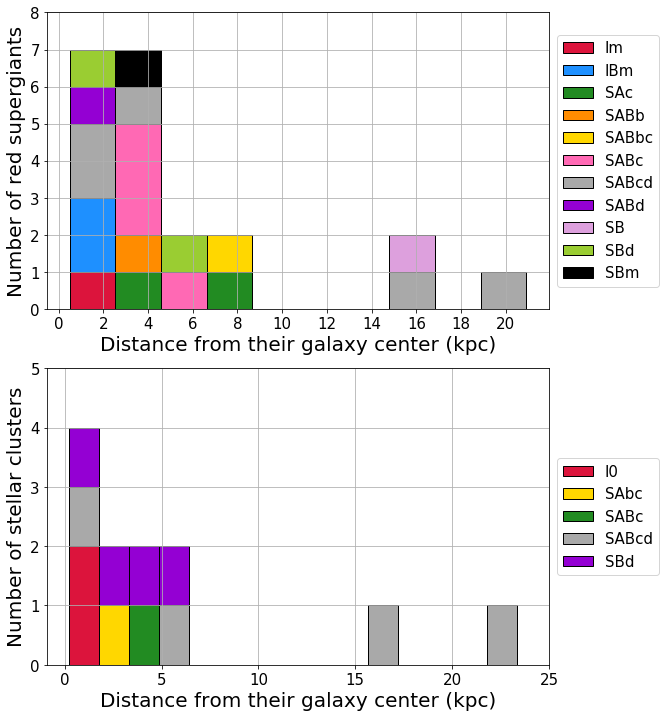

In [560]:
Im_rsg = [2.1383819]
IBm_rsg = [0.55372426, 1.00212736]
SAc_rsg = [3.59695631, 7.27599568]
SABb_rsg = [2.85514482]
SABbc_rsg = [6.69206648]
SABc_rsg = [4.43006855, 5.83419883, 2.8668699, 2.98852431]
SABcd_rsg = [3.24926365, 0.5939003, 16.03593121, 20.91358304, 0.49264221]
SABd_rsg = [2.1094695]
SB_rsg = [15.09314518]
SBd_rsg = [6.03977819, 0.87083912]
SBm_rsg = [3.99309114]

I0_sc = [0.23475551, 0.49728622]
SAbc_sc = [2.65054667]
SABc_sc = [3.48027368]
SABcd_sc = [15.89385518, 23.34292731, 5.13715993, 1.11503872]
SBd_sc = [1.41263166, 5.6232092, 3.41741475, 3.04112877]

histo_class_morph=plt.figure(1, figsize=(9,12))


plt.subplot(2, 1, 1)
plt.hist([Im_rsg, IBm_rsg, SAc_rsg, SABb_rsg, SABbc_rsg, SABc_rsg, SABcd_rsg, SABd_rsg, SB_rsg, SBd_rsg, SBm_rsg], normed=False, bins=10, edgecolor='black', stacked=True, color=['crimson','dodgerblue','forestgreen','darkorange','gold','hotpink','darkgray','darkviolet','plum','yellowgreen','black']) #histogram of data
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('Im', 'IBm', 'SAc', 'SABb', 'SABbc', 'SABc', 'SABcd', 'SABd', 'SB', 'SBd', 'SBm'), fontsize=15, loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Number of red supergiants', fontsize=20)
plt.xlabel('Distance from their galaxy center (kpc)', fontsize=20)
plt.yticks(np.arange(0, 9, 1))
plt.xticks(np.arange(0, 22, 2))
plt.grid(True)

plt.subplot(2, 1, 2)
plt.hist([I0_sc, SAbc_sc, SABc_sc, SABcd_sc, SBd_sc], normed=False, bins=15, edgecolor='black', stacked=True, color=['crimson','gold','forestgreen','darkgray','darkviolet']) #histogram of data
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('I0', 'SAbc', 'SABc', 'SABcd', 'SBd'), fontsize=15, loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Number of stellar clusters', fontsize=20)
plt.xlabel('Distance from their galaxy center (kpc)', fontsize=20)
plt.yticks(np.arange(0, 6, 1))
plt.xticks(np.arange(0, 30, 5))
plt.grid(True)

histo_class_morph.savefig('histo_class.png',dpi=400)

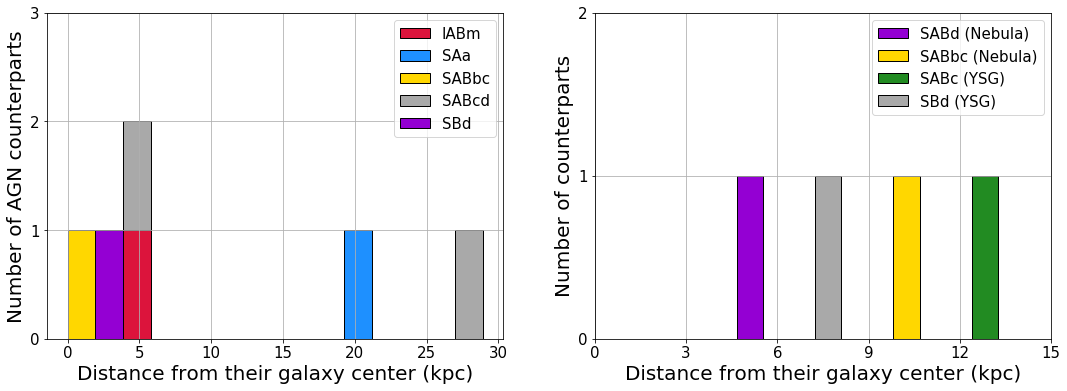

In [555]:
IABm_agn = [5.42589059]
SAa_agn = [19.76121694]
SABbc_agn = [20.45551386]
#SAcd_agn = [0.00059599]
SABcd_agn = [28.89665726, 5.73554442]
#SB_agn = [0.00497529]
SBd_agn = [2.72717475]

SABd_neb = [4.67216988]
SABbc_neb = [10.47797539]
SABc_ysg = [13.24554343]
SBd_ysg = [7.6589899]

histo_class_morph_others=plt.figure(1, figsize=(18,6))

plt.subplot(1, 2, 1)
plt.hist([IABm_agn, SAa_agn, SAcd_agn, SABcd_agn, SBd_agn], normed=False, bins=15, edgecolor='black', stacked=True, color=['crimson','dodgerblue','gold','darkgray','darkviolet']) #histogram of data
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('IABm', 'SAa', 'SABbc','SABcd', 'SBd'), fontsize=15)
plt.ylabel('Number of AGN counterparts', fontsize=20)
plt.xlabel('Distance from their galaxy center (kpc)', fontsize=20)
plt.yticks(np.arange(0, 4, 1))
#plt.xticks(np.arange(0, 22, 2))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist([SABd_neb, SABbc_neb, SABc_ysg, SBd_ysg], normed=False, bins=10, edgecolor='black', stacked=True, color=['darkviolet','gold','forestgreen','darkgray']) #histogram of data
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().legend(('SABd (Nebula)', 'SABbc (Nebula)', 'SABc (YSG)', 'SBd (YSG)'), fontsize=15)
plt.ylabel('Number of counterparts', fontsize=20)
plt.xlabel('Distance from their galaxy center (kpc)', fontsize=20)
plt.yticks(np.arange(0, 3, 1))
plt.xticks(np.arange(0, 18, 3))
plt.grid(True)

histo_class_morph_others.savefig('histo_class_others.png',dpi=400)

In [456]:
import pandas as pd
from collections import Counter
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

galaxies = [] # Defining the array

with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/observed_galaxies.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        galaxies.append(row[0])  

galaxies_det = [] # Defining the array

with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/observed_galaxies_det.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        galaxies_det.append(row[0])  

#print pd.Series(galaxies).value_counts()
#print pd.Series(galaxies_det).value_counts()

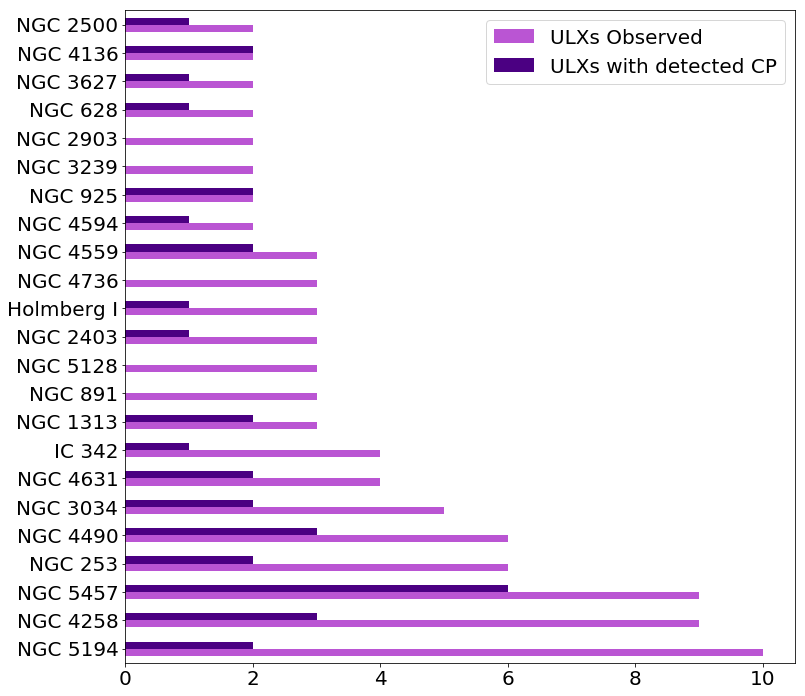

In [537]:
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
obs_galaxies = [] # Defining the array
num_obs = []

with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/obs.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        obs_galaxies.append(row[0])
        num_obs.append(float(row[1]))

det_galaxies = [] # Defining the array
num_det = []

with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/det.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        det_galaxies.append(row[0])
        num_det.append(float(row[1]))
        
galaxies_plot = pd.DataFrame({'ULXs Observed': num_obs,'ULXs with detected CP': num_det}, index=obs_galaxies)
barplot = galaxies_plot.plot.barh(figsize=(12,12), color=('mediumorchid','indigo'))
fig_gal = barplot.get_figure()
fig_gal.savefig('histo_galaxies.png',dpi=400)

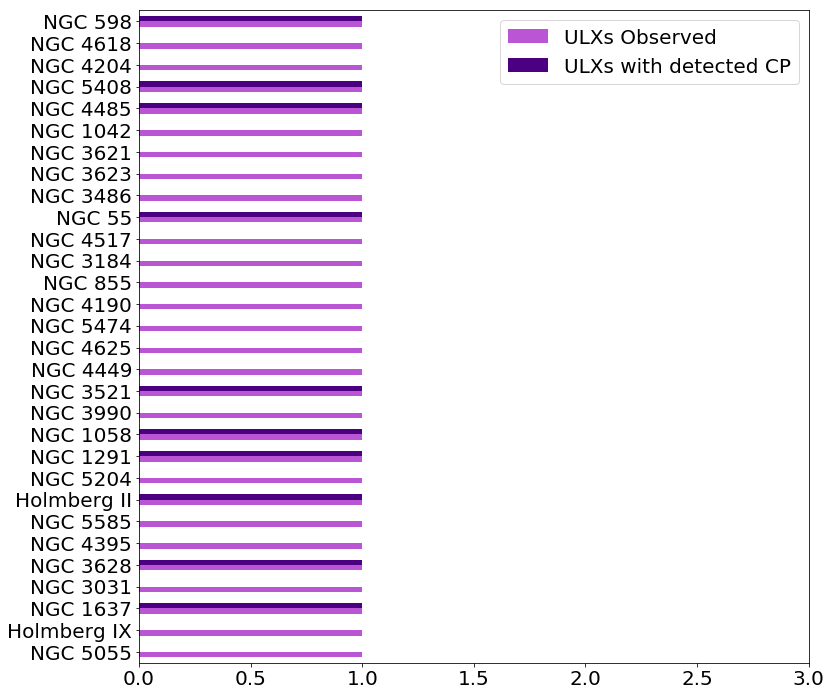

In [538]:
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
obs_galaxies1 = [] # Defining the array
num_obs1 = []

with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/obs_1ulx.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        obs_galaxies1.append(row[0])
        num_obs1.append(float(row[1]))

det_galaxies1 = [] # Defining the array
num_det1 = []

with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/det_1ulx.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        det_galaxies1.append(row[0])
        num_det1.append(float(row[1]))
        
galaxies_plot1 = pd.DataFrame({'ULXs Observed': num_obs1,'ULXs with detected CP': num_det1}, index=obs_galaxies1)
barplot1 = galaxies_plot1.plot.barh(figsize=(12,12), xlim=(0,3), color=('mediumorchid','indigo'))
fig_gal1 = barplot1.get_figure()
fig_gal1.savefig('histo_galaxies1.png',dpi=400)

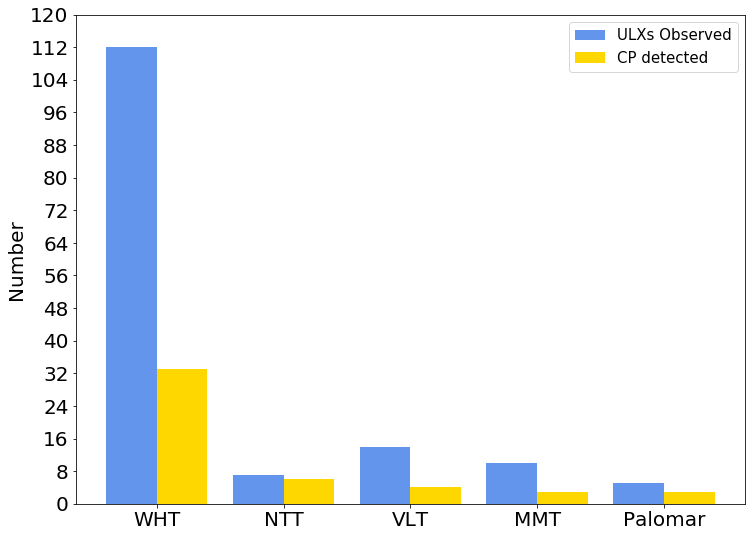

In [540]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
telescopes = ['WHT', 'NTT', 'VLT', 'MMT', 'Palomar']
obs = [112, 7, 14, 10, 5]
det = [33, 6, 4, 3, 3]

x = np.arange(len(telescopes))  # the label locations
width = 0.4  # the width of the bars

tel_obs, ax = plt.subplots(1, figsize=(12,9))
rects1 = ax.bar(x - width/2, obs, width, label='ULXs Observed', color='cornflowerblue')
rects2 = ax.bar(x + width/2, det, width, label='CP detected', color='gold')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(telescopes, rotation=0)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(np.arange(0, 128, 8))
ax.legend()

tel_obs.savefig('telescopes.png',dpi=400)

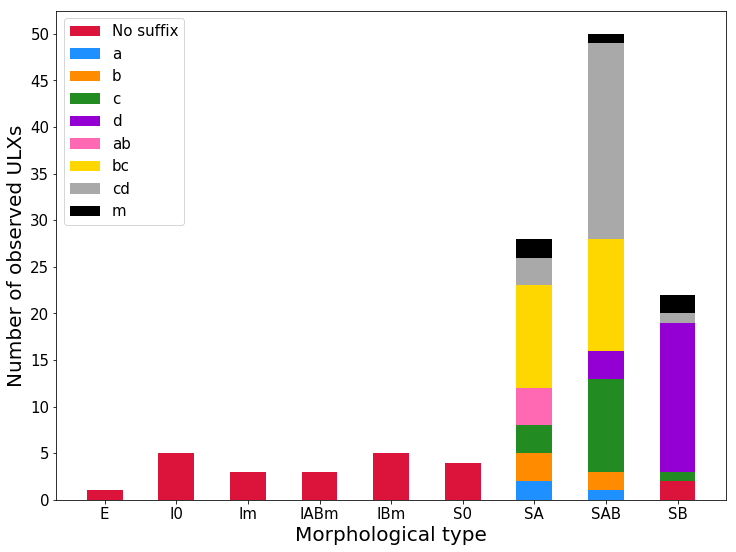

In [551]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
types = ['E', 'I0', 'Im', 'IABm', 'IBm', 'S0', 'SA', 'SAB', 'SB']
base = [1, 5, 3, 3, 5, 4, 0, 0, 2]
a = [0, 0, 0, 0, 0, 0, 2, 1, 0]
base_a = [0, 0, 0, 0, 0, 0, 2, 1, 2]
b = [0, 0, 0, 0, 0, 0, 3, 2, 0]
base_b = [0, 0, 0, 0, 0, 0, 5, 3, 2]
c = [0, 0, 0, 0, 0, 0, 3, 10, 1]
base_c = [0, 0, 0, 0, 0, 0, 8, 13, 3]
d = [0, 0, 0, 0, 0, 0, 0, 3, 16]
base_d = [0, 0, 0, 0, 0, 0, 8, 16, 19]
a_b = [0, 0, 0, 0, 0, 0, 4, 0, 0]
base_ab = [0, 0, 0, 0, 0, 0, 12, 16, 19]
b_c = [0, 0, 0, 0, 0, 0, 11, 12, 0]
base_bc = [0, 0, 0, 0, 0, 0, 23, 28, 19]
c_d = [0, 0, 0, 0, 0, 0, 3, 21, 1]
base_cd = [0, 0, 0, 0, 0, 0, 26, 49, 20]
m = [0, 0, 0, 0, 0, 0, 2, 1, 2]

x2 = np.arange(len(types))  # the label locations
width = 0.5  # the width of the bars

morph, ax = plt.subplots(1, figsize=(12,9))
rects1 = ax.bar(x2, base, width, label='No suffix',color ='crimson')
rects2 = ax.bar(x2, a, width, bottom=base, label='a',color ='dodgerblue')
rects3 = ax.bar(x2, b, width, bottom=base_a, label='b',color ='darkorange')
rects4 = ax.bar(x2, c, width, bottom=base_b, label='c',color ='forestgreen')
rects5 = ax.bar(x2, d, width, bottom=base_c, label='d',color ='darkviolet')
rects6 = ax.bar(x2, a_b, width, bottom=base_d, label='ab',color ='hotpink')
rects7 = ax.bar(x2, b_c, width, bottom=base_ab, label='bc',color ='gold')
rects8 = ax.bar(x2, c_d, width, bottom=base_bc, label='cd',color ='darkgray')
rects9 = ax.bar(x2, m, width, bottom=base_cd, label='m',color ='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of observed ULXs', fontsize=20)
ax.set_xlabel('Morphological type', fontsize=20)
ax.set_xticks(x2)
ax.set_xticklabels(types, rotation=0)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(x2, ('E', 'I0', 'Im', 'IABm', 'IBm', 'S0', 'SA', 'SAB', 'SB'))
plt.yticks(np.arange(0, 55, 5))
ax.legend()

morph.savefig('morph.png',dpi=400)

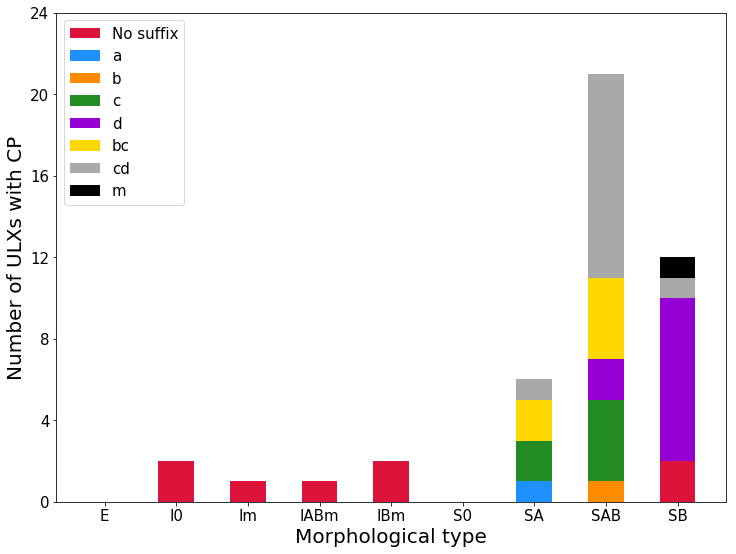

In [552]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
typesd = ['E', 'I0', 'Im', 'IABm', 'IBm', 'S0', 'SA', 'SAB', 'SB']
based = [0, 2, 1, 1, 2, 0, 0, 0, 2]
ad = [0, 0, 0, 0, 0, 0, 1, 0, 0]
base_ad = [0, 0, 0, 0, 0, 0, 1, 0, 2]
bd = [0, 0, 0, 0, 0, 0, 0, 1, 0]
base_bd = [0, 0, 0, 0, 0, 0, 1, 1, 2]
cd = [0, 0, 0, 0, 0, 0, 2, 4, 0]
base_cd = [0, 0, 0, 0, 0, 0, 3, 5, 2]
dd = [0, 0, 0, 0, 0, 0, 0, 2, 8]
base_dd = [0, 0, 0, 0, 0, 0, 3, 7, 10]
b_cd = [0, 0, 0, 0, 0, 0, 2, 4, 0]
base_bcd = [0, 0, 0, 0, 0, 0, 5, 11, 10]
c_dd = [0, 0, 0, 0, 0, 0, 1, 10, 1]
base_cdd = [0, 0, 0, 0, 0, 0, 6, 21, 11]
md = [0, 0, 0, 0, 0, 0, 0, 0, 1]

x2d = np.arange(len(typesd))  # the label locations
width = 0.5  # the width of the bars

morphd, ax = plt.subplots(1, figsize=(12,9))
rects1d = ax.bar(x2d, based, width, label='No suffix',color ='crimson')
rects2d = ax.bar(x2d, ad, width, bottom=based, label='a',color ='dodgerblue')
rects3d = ax.bar(x2d, bd, width, bottom=base_ad, label='b',color ='darkorange')
rects4d = ax.bar(x2d, cd, width, bottom=base_bd, label='c',color ='forestgreen')
rects5d = ax.bar(x2d, dd, width, bottom=base_cd, label='d',color ='darkviolet')
rects7d = ax.bar(x2d, b_cd, width, bottom=base_dd, label='bc',color ='gold')
rects8d = ax.bar(x2d, c_dd, width, bottom=base_bcd, label='cd',color ='darkgray')
rects9d = ax.bar(x2d, md, width, bottom=base_cdd, label='m',color ='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of ULXs with CP', fontsize=20)
ax.set_xlabel('Morphological type', fontsize=20)
ax.set_xticks(x2d)
ax.set_xticklabels(typesd, rotation=0)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(x2d, ('E', 'I0', 'Im', 'IABm', 'IBm', 'S0', 'SA', 'SAB', 'SB'))
plt.yticks(np.arange(0, 28, 4))
ax.legend()

morphd.savefig('morph_det.png',dpi=400)

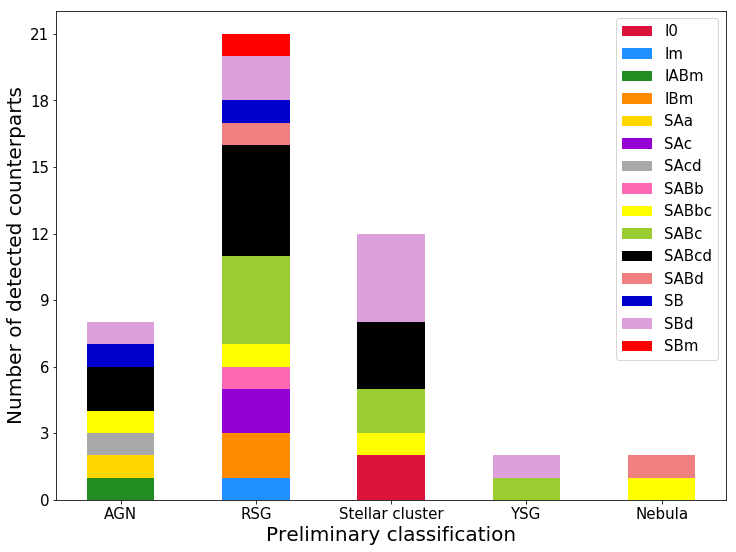

In [577]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
classes = ['AGN', 'RSG', 'Stellar cluster', 'YSG', 'Nebula']
I0 = [0, 0, 2, 0, 0]
Im = [0, 1, 0, 0, 0]
base1 = [0, 1, 2, 0, 0]
IABm = [1, 0, 0, 0, 0]
base2 = [1, 1, 2, 0, 0]
IBm = [0, 2, 0, 0, 0]
base3 = [1, 3, 2, 0, 0]
SAa = [1, 0, 0, 0, 0]
base4 = [2, 3, 2, 0, 0]
SAc = [0, 2, 0, 0, 0]
base5 = [2, 5, 2, 0, 0]
SAcd = [1, 0, 0, 0, 0]
base6 = [3, 5, 2, 0, 0]
SABb = [0, 1, 0, 0, 0]
base7 = [3, 6, 2, 0, 0]
SABbc = [1, 1, 1, 0, 1]
base8 = [4, 7, 3, 0, 1]
SABc = [0, 4, 2, 1, 0]
base9 = [4, 11, 5, 1, 1]
SABcd = [2, 5, 3, 0, 0]
base10 = [6, 16, 8, 1, 1]
SABd = [0, 1, 0, 0, 1]
base11 = [6, 17, 8, 1, 2]
SB = [1, 1, 0, 0, 0]
base12 = [7, 18, 8, 1, 2]
SBd = [1, 2, 4, 1, 0]
base13 = [8, 20, 12, 2, 2]
SBm = [0, 1, 0, 0, 0]

x3 = np.arange(len(classes))  # the label locations
width = 0.5  # the width of the bars

classes_morph, ax = plt.subplots(1, figsize=(12,9))
class1 = ax.bar(x3, I0, width, label='I0', color='crimson')
class2 = ax.bar(x3, Im, width, bottom=I0, label='Im', color='dodgerblue')
class3 = ax.bar(x3, IABm, width, bottom=base1, label='IABm', color='forestgreen')
class4 = ax.bar(x3, IBm, width, bottom=base2, label='IBm', color='darkorange')
class5 = ax.bar(x3, SAa, width, bottom=base3, label='SAa', color='gold')
class6 = ax.bar(x3, SAc, width, bottom=base4, label='SAc', color='darkviolet')
class7 = ax.bar(x3, SAcd, width, bottom=base5, label='SAcd', color='darkgray')
class8 = ax.bar(x3, SABb, width, bottom=base6, label='SABb', color='hotpink')
class9 = ax.bar(x3, SABbc, width, bottom=base7, label='SABbc', color='yellow')
class10 = ax.bar(x3, SABc, width, bottom=base8, label='SABc', color='yellowgreen')
class11 = ax.bar(x3, SABcd, width, bottom=base9, label='SABcd', color='black')
class12 = ax.bar(x3, SABd, width, bottom=base10, label='SABd', color='lightcoral')
class13 = ax.bar(x3, SB, width, bottom=base11, label='SB',color='mediumblue')
class14 = ax.bar(x3, SBd, width, bottom=base12, label='SBd',color='plum')
class15 = ax.bar(x3, SBm, width, bottom=base13, label='SBm',color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of detected counterparts', fontsize=20)
ax.set_xlabel('Preliminary classification', fontsize=20)
ax.set_xticks(x3)
ax.set_xticklabels(typesd, rotation=0)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(x3, ('AGN', 'RSG', 'Stellar cluster', 'YSG', 'Nebula'))
plt.yticks(np.arange(0, 24, 3))
ax.legend()

classes_morph.savefig('classes_morph.png',dpi=400)

In [516]:
from astropy import units as u
from astropy.coordinates import SkyCoord

c1a = [] # Defining the array
c1b = [] # Defining the array
c1c = [] # Defining the array
c2a = [] # Defining the array
c2b = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/coords_galaxies.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        c1a.append(row[0])
        c1b.append(row[1])
        
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/coords_dist.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        c1c.append(float(row[0])*1.0e3)
                
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/coords_ulxs.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        c2a.append(row[0])
        c2b.append(row[1])

coord1 = []
coord2 = []
sep = []

for i in range(0,len(c1a)):
    coord1.append(i)
    coord2.append(i)
    sep.append(i)
    coord1[i] = SkyCoord(c1a[i],c1b[i],c1c[i],unit=(u.hourangle, u.deg, u.kpc))  # your coords
    coord2[i] = SkyCoord(c2a[i],c2b[i],c1c[i],unit=(u.hourangle, u.deg, u.kpc))  # first object in table
    sep[i] = coord1[i].separation_3d(coord2[i])
    
#print sep

c1aobs = [] # Defining the array
c1bobs = [] # Defining the array
c1cobs = [] # Defining the array
c2aobs = [] # Defining the array
c2bobs = [] # Defining the array
# Opening and reading the file
with open('/Users/kristhell/ownCloud/paper-second-nir/histograms/coords_galaxies_obs.txt','r') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        c1aobs.append(row[0])
        c1bobs.append(row[1])
        c1cobs.append(float(row[2])*1.0e3)
        c2aobs.append(row[3])      
        c2bobs.append(row[4])        
        
coord1obs = []
coord2obs = []
sepobs = []

for i in range(0,len(c1aobs)):
    coord1obs.append(i)
    coord2obs.append(i)
    sepobs.append(i)
    coord1obs[i] = SkyCoord(c1aobs[i],c1bobs[i],c1cobs[i],unit=(u.hourangle, u.deg, u.kpc))  # your coords
    coord2obs[i] = SkyCoord(c2aobs[i],c2bobs[i],c1cobs[i],unit=(u.hourangle, u.deg, u.kpc))  # first object in table
    sepobs[i] = coord1obs[i].separation_3d(coord2obs[i])

#print sepobs